<a href="https://colab.research.google.com/github/JLuisSanchez/Data-Science-AI---Master-Devf/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning 🚮
![Datacleaning](https://camo.githubusercontent.com/00e2c6fad6b354d48d80b381d19ffa16c07dc69e/68747470733a2f2f692e696d67666c69702e636f6d2f3478793266722e6a7067)



En análisis de datos, aproximadamente del 60% al 80% del tiempo es invertido en limpiar y organizar los datos, y con justa razón, pues la limpieza de datos es la etapa previa al interrogatorio que llevaremos a cabo posteriormente para obtener información. Este proceso rara vez se realiza en una sola ocasión, suele ser un proceso iterativo.
En esta lectura, abordaremos algunos de los casos más comunes de "datos sucios" y cómo afrontarlos.


> Nuestros Paquetes

        - import pandas as pd   :   Tratamiento de datos
        - import numpy as np    :   Biblioteca numerica de python
        - import datetime       :   Manejo y tratamiento de Fechas
        - import chardet        :   Modulo de Encoding para caracteres

> Nuestros Datasets

        - Dataset Derrumbes By NASA (https://www.kaggle.com/nasa/landslide-events)
        - Dataset Terremotos By Us Geological Survey (https://www.kaggle.com/usgs/earthquake-database)
        - Dataset Fifa By Karan Gadiya (https://www.kaggle.com/karangadiya/fifa19/)
        - Dataset Adult By Ronny Kohavi and Barry Becker (http://archive.ics.uci.edu/ml/datasets/Adult)
        - Dataset Kickstarter By Mickaël Mouillé obtained with Kickstarter Platform API (https://www.kaggle.com/kemical/kickstarter-projects)

### Python importamos paquetes

In [ ]:
import pandas as pd  
import numpy as np   
import seaborn as sns 
import datetime
import chardet
!python --version

Python 3.7.13


### Leer Datasets  (Pandas)

In [ ]:
earthquakes = pd.read_csv('terremotos.csv')
derrumbes = pd.read_csv('derrumbes.csv')
fifa = pd.read_csv('fifa.csv')
fifaM = pd.read_csv('fifaM.csv')
adult = pd.read_csv('adult.csv')
chavos_prepa = pd.read_csv('snsdata.csv')
accounts = pd.read_csv('accounts.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,4,8,9,14,16,17,18,23,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Manejo y transformación de Fechas

In [ ]:
# Vamos a utilizar para las fechas datasets con terremotos entre 1965 y 2016 y con Derrumbes enre 2007 y 2016
derrumbes.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [ ]:
# Checar Tipo de Dato de la columna fecha en los derrumbes
derrumbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

In [ ]:
# dtype: object Pandas usa el Object para referirse a varios tipos de datos pero normalmente son strings
derrumbes['date'].dtype

dtype('O')

In [ ]:
derrumbes['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

[**to_datetime()** ](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) es un método que ayuda a convertir strin en un formato de date que puede leer python como fechas

**Syntax**:

pandas.to_datetime(arg, format=None, ...)

 
Parameters:

* arg: An integer, string, float, list or dict object to convert in to Date time object.
* format: String input to tell position of day, month and year.

In [ ]:
# Transformar a fechas de a devis
derrumbes['date_parsed'] = pd.to_datetime(derrumbes['date'], format="%m/%d/%y")
derrumbes['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [ ]:
#Podemos interactuar con las partes de la fecha
dia_del_mes_derrumbes = derrumbes['date_parsed'].dt.day
dia_del_mes_derrumbes

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

In [ ]:
# Grafiquemos para double-check
# doesn't hurt to double-check that the days of the month we've extracted make sense.
dia_del_mes_derrumbes.isnull().sum()
dia_del_mes_derrumbes = dia_del_mes_derrumbes.dropna()
len(dia_del_mes_derrumbes)

1690

In [ ]:
sns.histplot(dia_del_mes_derrumbes, bins=31)

2

In [ ]:
# Que pasa si la fecha de un Dataset viene en varios Formatos???
accounts

,Unnamed: 0,id,date_opened,total
0,1,A880C79F,2003-10-19,169305
1,2,BE8222DF,"October 05, 2018",107460
2,3,19F9E113,2008-07-29,15297152
3,4,A2FE52A3,2005-06-09,14897272
4,5,F6DC2C08,2012-03-31,124568
...,...,...,...,...
93,94,65EAC615,"February 20, 2004",140191
94,95,6C7509C9,"September 16, 2000",212089
95,96,BD969A9D,2007-04-29,167238
96,97,B0CDCE3D,"May 28, 2014",145240


In [ ]:
# Notilla extra, si en la columna a parsear hay varios tipos de formato de fecha, mejor decirle al python que la infiera
accounts['date_opened_parsed'] = pd.to_datetime(accounts['date_opened'], infer_datetime_format=True)
accounts['date_opened_parsed']

0    2003-10-19
1    2018-10-05
2    2008-07-29
3    2005-06-09
4    2012-03-31
        ...    
93   2004-02-20
94   2000-09-16
95   2007-04-29
96   2014-05-28
97   2007-10-14
Name: date_opened_parsed, Length: 98, dtype: datetime64[ns]

### Remover y reemplazar  y modificar caracteres no deseados
Otro problema común es la presencia de caracteres que no deseamos en nuestros valores. Estos pueden constituir alguno de los siguientes casos:
 - Caracteres erróneos introducidos por error humano o error de máquina al realizar los registros.
 - Caracteres que fueron introducidos para indicar una divisa, unidad de medida, categoría, etc. O bien para simplificar los datos.
 - Caracteres erróneos introducidos por una cambio en la codificación de nuestro sistema respecto a la codificación de los datos.

In [ ]:
#por ejemplo en esta dataset http://archive.ics.uci.edu/ml/datasets/Adult
adult

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#hay un detalle con los nombres de las columnas
adult.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [ ]:
#Para evitar batallar con esos espacios             https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
adult = adult.rename(columns={' Male': 'Male', ' Bachelors':'Bachelors'})

In [ ]:
adult.columns

Index(['39', ' State-gov', ' 77516', 'Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', 'Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

¿Cómo cambiarias las demás columnas para que no tengan ese espacio?**texto en negrita**

In [ ]:
#escribe tu código aquí


### Otros tipos de caracteres no deseados

In [ ]:
# Utilizaremos la Bd de fifa
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
#Veamos su estructura
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

#### Que tal ahora una descipcion estadística? 🙈

In [ ]:
fifa.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [ ]:
#sueldo
fifa['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [ ]:
str.translate?

In [ ]:
mi_diccionario = { ord('€'): None, ord('K'): None }

fifa['wage_trimmed'] = fifa['Wage'].str.translate(mi_diccionario)
fifa['wage_trimmed']

0        565
1        405
2        290
3        260
4        355
        ... 
18202      1
18203      1
18204      1
18205      1
18206      1
Name: wage_trimmed, Length: 18207, dtype: object

In [ ]:
fifa['wage_numeric'] = fifa['wage_trimmed'].astype(int) * 1000
fifa['wage_numeric']

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: wage_numeric, Length: 18207, dtype: int64

In [ ]:
fifa[fifa['wage_numeric']==565000]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,wage_trimmed,wage_numeric
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,565,565000


#### Otro tipo de caso aunque similiar tiene un particularidad 🤐

In [ ]:
fifaM

,Unnamed: 0,X,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause,Release.Clause_trimmed
0,1,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,...,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,565000000
1,2,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,...,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,405000000
2,3,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,...,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,290000000
3,4,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,...,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,260000000
4,5,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,...,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,355000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18203,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,...,40,48,47,10,13,7,8,9,€143000,143000
18203,18204,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,...,22,15,19,10,9,9,5,12,€113000,113000
18204,18205,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,...,32,13,11,6,5,10,6,13,€165000,165000
18205,18206,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,...,20,25,27,14,6,14,8,9,€143000,143000


In [ ]:
fifaM.columns

Index(['Unnamed: 0', 'X', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club.Logo', 'Value', 'Wage', 'Special',
       'Preferred.Foot', 'International.Reputation', 'Weak.Foot',
       'Skill.Moves', 'Work.Rate', 'Body.Type', 'Real.Face', 'Position',
       'Jersey.Number', 'Joined', 'Loaned.From', 'Contract.Valid.Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'Sli

In [ ]:
#la cláusula de liberación ⚽💸💸💸💸💸💰

fifaM['Release.Clause']

0          €565M
1          €405M
2          €290M
3          €260M
4          €355M
          ...   
18202    €143000
18203    €113000
18204    €165000
18205    €143000
18206    €165000
Name: Release.Clause, Length: 18207, dtype: object

In [ ]:
str.replace?

In [ ]:
fifaM['Release.Clause'] = fifaM['Release.Clause'].str.replace('K', '000')
fifaM['Release.Clause']

0          €565M
1          €405M
2          €290M
3          €260M
4          €355M
          ...   
18202    €143000
18203    €113000
18204    €165000
18205    €143000
18206    €165000
Name: Release.Clause, Length: 18207, dtype: object

In [ ]:
mi_diccionario_2 = { ord('€'): None, ord('K'): 000, ord('M'): '000000'}
fifaM['Release.Clause_trimmed'] = fifaM['Release.Clause'].str.translate(mi_diccionario_2)


In [ ]:
fifaM['Release.Clause_numeric'] = fifaM['Release.Clause_trimmed'].dropna().astype(float)
fifaM['Release.Clause_numeric'] = fifaM['Release.Clause_numeric'].dropna().astype(int)
fifaM['Release.Clause_numeric']

0        565000000.0
1        405000000.0
2        290000000.0
3        260000000.0
4        355000000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release.Clause_numeric, Length: 18207, dtype: float64


## Vamos bien!!


![vas_bien](https://i.pinimg.com/564x/86/1f/c0/861fc0bbaf64bd6c65a8bf6472514300.jpg)

#### Que bueno que fifa traía el simbolo de Euro como simbolo de Euro, no? Pero. qué pasa si el dataset tiene algo como esto:
#### æ–‡å—åŒ–ã?? o ����������

In [ ]:
##  What Are encodings???? ##

# Character encodings are specific sets of rules for mapping from raw binary byte strings 
# (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi")
# UTF-8 is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. 
# It's when things aren't in UTF-8 that you run into trouble.


In [ ]:
Police_Killing = pd.read_csv("PoliceKillingsUS.csv", encoding='utf-8')

UnicodeDecodeError: ignored

In [ ]:
with open("PoliceKillingsUS.csv", 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [ ]:
Police_Killing = pd.read_csv("PoliceKillingsUS.csv", encoding='Windows-1252')
Police_Killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:

# encode it to a different encoding, replacing characters that raise errors


In [ ]:
# convert it back to utf-8

## The best time to convert non UTF-8 input into UTF-8 is when you read in files


![image.png](attachment:4f70f4bc-de04-4d1d-9c4c-7067fc61abdb.png)

In [ ]:
polis = pd.read_csv("data/PoliceKillingsUS.csv")

In [ ]:
#https://docs.python.org/3/library/codecs.html#standard-encodings


## Valores Fuera de Rango y valores perdidos
Cuando hacemos limpieza de datos, siempre es necesario recurrir a nuestro conocimiento del tema y del origen de la base de datos para saber si estos tienen sentido. A veces puede ser algo tan complicado como cuadrar cantidades que cambian en el tiempo respecto de otras 2 o 3 variables, o puede ser algo más del "sentido común" como identificar que un valor negativo en una columna de edades constituye una anomalía.

In [ ]:
chavos_prepa

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
chavos_prepa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [ ]:
chavos_prepa.describe(include='all')

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,27276,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.500000,NaN,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,NaN,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,NaN,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,NaN,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,NaN,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,NaN,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Vamos a ver cuantos Valores NA tenemos en nuestra columna de Age
missing_values_age_count = chavos_prepa['age'].isnull().sum()
missing_values_age_count

5086

In [ ]:
number_of_rows = len(chavos_prepa)
number_of_rows

30000

In [ ]:
print('Porcentaje total de Edades perdidas en el dataset es:', (missing_values_age_count/number_of_rows) *100)

Porcentaje total de Edades perdidas en el dataset es: 16.953333333333333


In [ ]:
chavos_prepa['age'].dropna()

0        18.982
1        18.801
2        18.335
3        18.875
4        18.995
          ...  
29995    16.115
29996    15.792
29997    15.784
29998    16.378
29999    18.724
Name: age, Length: 24914, dtype: float64

![morro_meco](https://pbs.twimg.com/media/Edm2smXU4AArpjW.jpg)

### Truco aquí 👇🏼

In [ ]:
chavos_prepa['age_filled'] = np.where(chavos_prepa['age'].isnull(), np.mean(chavos_prepa['age']), chavos_prepa['age'])
chavos_prepa['age_filled']

0        18.982
1        18.801
2        18.335
3        18.875
4        18.995
          ...  
29995    16.115
29996    15.792
29997    15.784
29998    16.378
29999    18.724
Name: age_filled, Length: 30000, dtype: float64

In [ ]:
chavos_prepa['age_filled'].isnull().sum()

0

### Acotar Valores y double double check 🙌🏼

In [ ]:
## Crearemos un histograma para identificar valores fuera de rango
# Creamos los cortes
## Crearemos un histograma para identificar valores fuera de rango
# Creamos los cortes
min_teen_age = 15
max_teen_age = 18

In [ ]:
np.max(chavos_prepa['age_filled'])

106.927

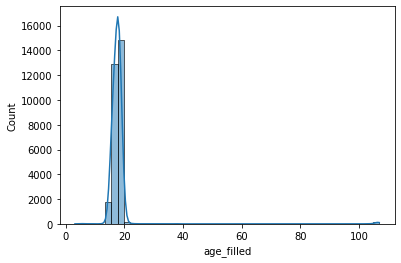

In [ ]:
sns.histplot(chavos_prepa['age_filled'], kde=True, bins=50)

In [ ]:
# Reemplazamos las edades por encima del rango con la edad máxima
chavos_prepa['age_filled'] = np.where(chavos_prepa['age_filled'] > max_teen_age, max_teen_age, chavos_prepa['age_filled'])

print(int(np.max(chavos_prepa['age_filled'])))

18


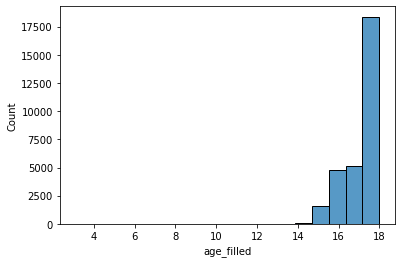

In [ ]:
sns.histplot(chavos_prepa['age_filled'], kde=False, bins=int(np.max(chavos_prepa['age_filled'])))

In [ ]:
# Reemplazamos las edades por debajo del rango con la edad mínima
chavos_prepa['age_filled'] = np.where(chavos_prepa['age_filled'] < min_teen_age, min_teen_age, chavos_prepa['age_filled'])

print(int(np.min(chavos_prepa['age_filled'])))

15


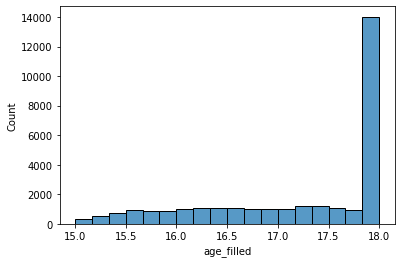

In [ ]:
sns.histplot(chavos_prepa['age_filled'], kde=False, bins=int(np.max(chavos_prepa['age_filled'])))

### Uniformidad en tipo de cambio

In [ ]:
#  Vamos a ver para que nos va a servir la base anterior
accounts

,Unnamed: 0,id,date_opened,total
0,1,A880C79F,2003-10-19,169305
1,2,BE8222DF,"October 05, 2018",107460
2,3,19F9E113,2008-07-29,15297152
3,4,A2FE52A3,2005-06-09,14897272
4,5,F6DC2C08,2012-03-31,124568
...,...,...,...,...
93,94,65EAC615,"February 20, 2004",140191
94,95,6C7509C9,"September 16, 2000",212089
95,96,BD969A9D,2007-04-29,167238
96,97,B0CDCE3D,"May 28, 2014",145240


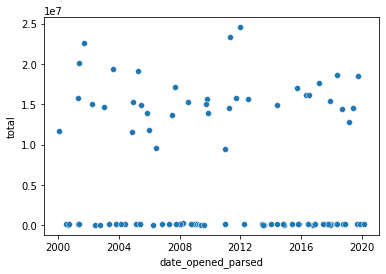

In [ ]:
accounts['date_opened_parsed'] = pd.to_datetime(accounts['date_opened'], infer_datetime_format=True)
accounts['date_opened_parsed']
sns.scatterplot(data=accounts, x="date_opened_parsed", y="total")

In [ ]:
# The formula to convert yen to dollars is USD = JPY / 104.
account_offices = pd.read_csv('account_offices.csv')

#account_offices.info()
account_offices

,id,office
0,A880C79F,New York
1,BE8222DF,New York
2,19F9E113,Tokyo
3,A2FE52A3,Tokyo
4,F6DC2C08,New York
...,...,...
93,65EAC615,New York
94,6C7509C9,New York
95,BD969A9D,New York
96,B0CDCE3D,New York


In [ ]:
accounts_global = pd.merge(accounts, account_offices, on="id")
accounts_global

,Unnamed: 0,id,date_opened,total,date_opened_parsed,office
0,1,A880C79F,2003-10-19,169305,2003-10-19,New York
1,2,BE8222DF,"October 05, 2018",107460,2018-10-05,New York
2,3,19F9E113,2008-07-29,15297152,2008-07-29,Tokyo
3,4,A2FE52A3,2005-06-09,14897272,2005-06-09,Tokyo
4,5,F6DC2C08,2012-03-31,124568,2012-03-31,New York
...,...,...,...,...,...,...
93,94,65EAC615,"February 20, 2004",140191,2004-02-20,New York
94,95,6C7509C9,"September 16, 2000",212089,2000-09-16,New York
95,96,BD969A9D,2007-04-29,167238,2007-04-29,New York
96,97,B0CDCE3D,"May 28, 2014",145240,2014-05-28,New York


In [ ]:
accounts_global['total_usd'] = np.where(accounts_global['office'] == 'Tokyo', accounts_global['total'] / 104, accounts_global['total'])
print(accounts_global)

    Unnamed: 0        id         date_opened     total date_opened_parsed  \
0            1  A880C79F          2003-10-19    169305         2003-10-19   
1            2  BE8222DF    October 05, 2018    107460         2018-10-05   
2            3  19F9E113          2008-07-29  15297152         2008-07-29   
3            4  A2FE52A3          2005-06-09  14897272         2005-06-09   
4            5  F6DC2C08          2012-03-31    124568         2012-03-31   
..         ...       ...                 ...       ...                ...   
93          94  65EAC615   February 20, 2004    140191         2004-02-20   
94          95  6C7509C9  September 16, 2000    212089         2000-09-16   
95          96  BD969A9D          2007-04-29    167238         2007-04-29   
96          97  B0CDCE3D        May 28, 2014    145240         2014-05-28   
97          98  33A7F03E    October 14, 2007    191839         2007-10-14   

      office  total_usd  
0   New York   169305.0  
1   New York   107460.0

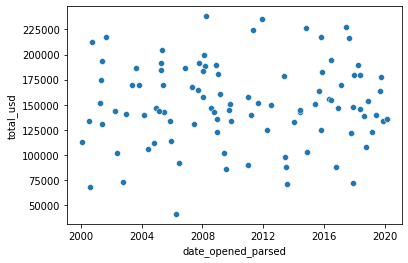

In [ ]:
sns.scatterplot(data=accounts_global, x="date_opened_parsed", y="total_usd")

### Datos duplicados
![gatos_duplicados](https://s-media-cache-ak0.pinimg.com/originals/d2/4c/c7/d24cc7a35abea701eb36dc58c53a3a1d.jpg)


Este problema se divide en dos tipos

     - Duplicados totales
     - Duplicados parciales


In [ ]:
letters = pd.read_csv('letters.csv')
letters

,column1,column2,column3
0,a,b,1000
1,a,c,4000
2,d,f,4500
3,a,f,7000
4,b,b,3000
5,a,b,1000
6,a,b,1000
7,a,b,3000
8,d,f,8000
9,d,f,5000


In [ ]:
letters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   column1  10 non-null     object
 1   column2  10 non-null     object
 2   column3  10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
duplic = letters.duplicated()
duplic

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8    False
9    False
dtype: bool

In [ ]:
letters[duplic]

,column1,column2,column3
5,a,b,1000
6,a,b,1000


In [ ]:
# Remover duplicados totales
letters = letters.drop_duplicates()
letters

,column1,column2,column3
0,a,b,1000
1,a,c,4000
2,d,f,4500
3,a,f,7000
4,b,b,3000
7,a,b,3000
8,d,f,8000
9,d,f,5000


In [ ]:
# Weno weno, pero y los duplicados de 1 sola columna???
letters = pd.read_csv('letters.csv')
letters

,column1,column2,column3
0,a,b,1000
1,a,c,4000
2,d,f,4500
3,a,f,7000
4,b,b,3000
5,a,b,1000
6,a,b,1000
7,a,b,3000
8,d,f,8000
9,d,f,5000


In [ ]:
letters = letters.rename(columns={"column1": "alumno", "column2": "curso", "column3": "pago"})

In [ ]:
letters

,alumno,curso,pago
0,a,b,1000
1,a,c,4000
2,d,f,4500
3,a,f,7000
4,b,b,3000
5,a,b,1000
6,a,b,1000
7,a,b,3000
8,d,f,8000
9,d,f,5000


In [ ]:
letters.drop_duplicates(subset=['alumno', 'curso'])

,alumno,curso,pago
0,a,b,1000
1,a,c,4000
2,d,f,4500
3,a,f,7000
4,b,b,3000


## Challenges

Esta colección consta de 5 ejercicios de los problemas típicos de limpieza de datos. Puedes resolverlos directamente en este enlace de [Kaggle](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)